 WITH PANDAS AND MATPLOTLIB

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

INSTRUCTIONS

* Number of people by gender
* Kill weapon
* Age of killed people
* Race of killed people
* Killed People According to Races (Pie Chart)
* Most common 15 Name or Surname of killed people

read data

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv',encoding="windows-1252")
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


### 1: Plot number of people by gender

In [4]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

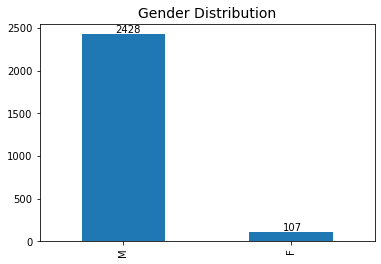

In [6]:
# with pandas

fig, ax = plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)
# or
# ax = kill.gender.value_counts().plot(kind='bar')

ax.set_title("Gender Distribution", fontsize=14)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

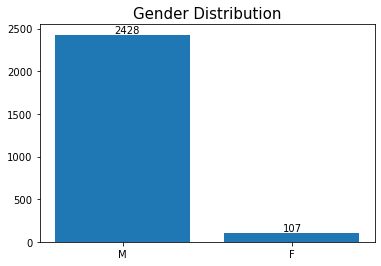

In [7]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index,kill.gender.value_counts().values)
ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

### 2: Plot 7 most common kill weapons

In [8]:
kill.armed.value_counts()[:7]

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [9]:
kill.armed.value_counts(dropna=False)[:7]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [10]:
common_weapons = kill.armed.value_counts(dropna=False)[:7]
common_weapons

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

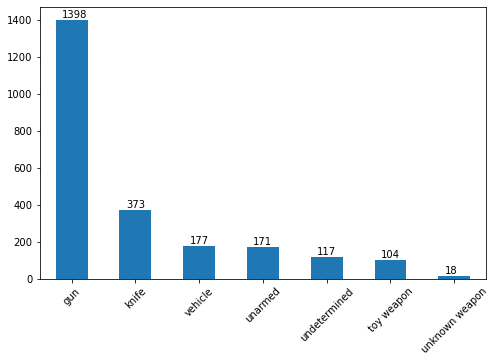

In [11]:
# with pandas
fig, ax = plt.subplots(figsize=(8,5))
common_weapons.plot(kind='bar',ax=ax)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

/var/folders/wk/n0rjrcc539b8hl_lgc074gsm0000gn/T/ipykernel_87711/3285920552.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(common_weapons.index, rotation=45)


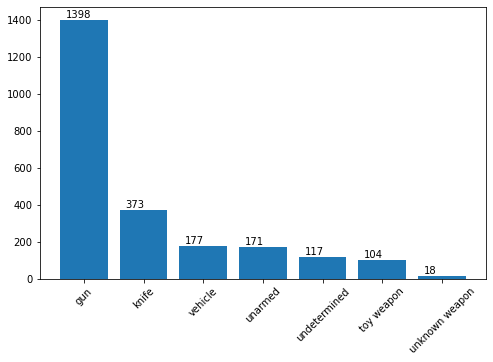

In [13]:
# with matplotlib
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x = common_weapons.index, height=common_weapons.values)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

### 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [14]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [56]:
kill["age_cat"]=kill.age.apply(lambda x : "above25" if x >=25 else ("below25" if x<25 else "others"))

In [57]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [16]:
age_class = kill.age_cat.value_counts()
age_class

above25    2008
below25     450
others       77
Name: age_cat, dtype: int64

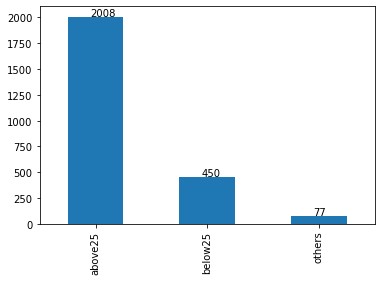

In [17]:
# with pandas
ax = age_class.plot.bar()

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.2, p.get_height()+10));

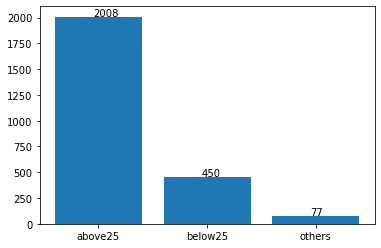

In [19]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x = age_class.index, height= age_class.values)

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.35, p.get_height()+10));

### 4: Plot number of killed poeple by race

In [20]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

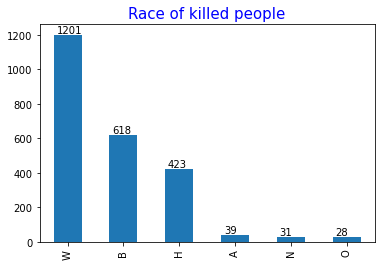

In [21]:
# with pandas
ax = race_freq.plot.bar()
ax.set_title('Race of killed people',color = 'blue',fontsize=15);
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+10));

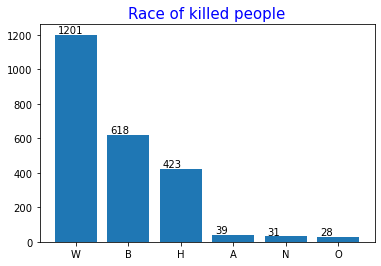

In [23]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x=race_freq.index, height=race_freq.values)
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+10));

### 5: Killed People According to Races (Pie Chart)

In [24]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [25]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [27]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

#### INSTRUCTION-1: Drop the all raws that contain missing value (dropna)

In [36]:
kill.dropna(inplace=True)

In [30]:
kill.shape

(2254, 15)

#### INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib) 

In [35]:
kill.race.value_counts(dropna=False)


W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [32]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [34]:
sizes=kill.race.value_counts().values
sizes

array([1168,  592,  401,   36,   29,   28])

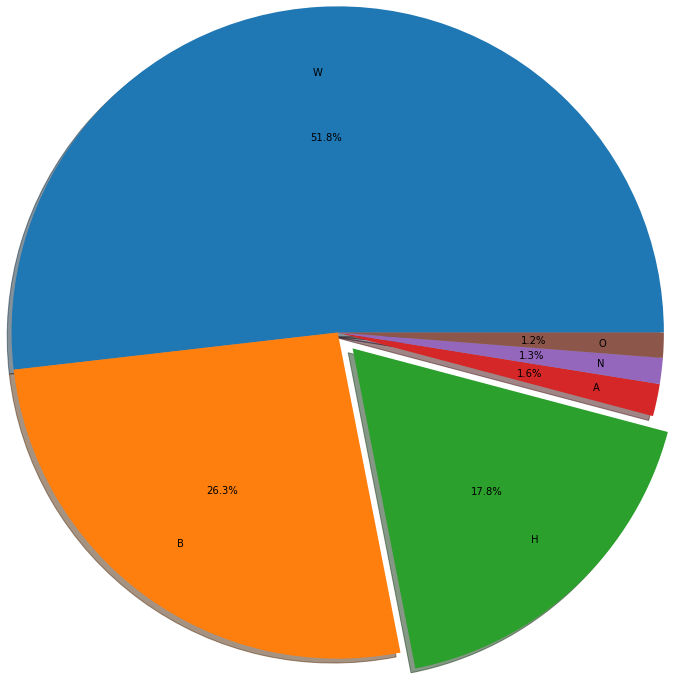

In [38]:
explode = (0, 0, 0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(x = sizes, 
        explode=explode, 
        labels=labels, 
        labeldistance=0.8,
        autopct='%.1f%%',

         shadow=True, 
        startangle=0,
         radius=1.5,
       );